# 00_Data_processing


Objective: 

    - Download A.oryzae genome
    - Parse through
    - Retrieve signal peptides
    - plot

In [1]:
from Bio import SeqIO
import pandas as pd
from Bio.Seq import Seq

In [2]:
path_to_file = '../data/00_All_proteins_and_partitions_Aoryzae_and_/FungiDB-59_AoryzaeRIB40_AnnotatedProteins.fasta'  

# Open file with "with" statement to avoid problems with access 
proteins = []

with open(path_to_file, mode='r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):

        # Extract individual parts of the FASTA record
        identifier = record.id
        description = record.description
        sequence = record.seq
        # append
        proteins.append(record)

In [3]:
#path_to_file = '../data/00_All_proteins_and_partitions_Aoryzae_and_/FungiDB-59_AoryzaeRIB40_AnnotatedProteins.fasta'  
#
## Open file with "with" statement to avoid problems with access 
#proteins = []
#
#with open(path_to_file, mode='r') as handle:
#    for record in SeqIO.parse(handle, 'fasta'):
#        proteins.append(record)
#        
## cross ref with proteomics acc numbers
#list_of_protemics_acc_numbers = ['AO090005000001-T-p1'] # here put the list
#
#new_list_of_the_proteins_for_deeploc = []
#for seq in proteins: 
#    if seq.id in list_of_protemics_acc_numbers: 
#        new_list_of_the_proteins_for_deeploc.append(seq)
#        
## write it to a fasta file
#with open(f"../data/00_All_proteins_and_partitions_Aoryzae_and_/deeploc_proteins.fasta", "w") as output_handle:
#    SeqIO.write(new_list_of_the_proteins_for_deeploc, output_handle, "fasta")

In [4]:
proteins[0].id


'AO090005000001-T-p1'

In [5]:
proteins[0].seq

Seq('MLISSVAKDGYGKDIWTLPFDSITRILKFTWLLQLLYIPALAATKMAFLCLYLR...RSR')

In [6]:
len(proteins)

12090

In [7]:
### Partitioning the proteins into 5000 long fasta files

In [8]:
partition1 = proteins[0:5000]
len(partition1)

5000

In [9]:
partition2 = proteins[5000:10000]
len(partition2)

5000

In [10]:
partition3 = proteins[10000:]
len(partition3)


2090

In [11]:
all_partitions = [[partition1]+[partition2]+[partition3]]
all_partitions = [partition1+partition2+partition3]

len(all_partitions)

1

In [12]:
with open(f"../data/00_All_proteins_and_partitions_Aoryzae_and_/partition1.fasta", "w") as output_handle:
    SeqIO.write(partition1, output_handle, "fasta")
with open(f"../data/00_All_proteins_and_partitions_Aoryzae_and_/partition2.fasta", "w") as output_handle:
    SeqIO.write(partition2, output_handle, "fasta")
with open(f"../data/00_All_proteins_and_partitions_Aoryzae_and_/partition3.fasta", "w") as output_handle:
    SeqIO.write(partition3, output_handle, "fasta")

These partitions have been sent to SignalP and run on their servers. 

### Examining SignalP output


gff files are just a text file. So we can parse it like a normal text file:

In [13]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord


def open_gff3_files(path:str= ''):
    with open(path, 'r') as infile:
        LINES = []
        for line in infile:
            LINES.append(line[:].split('\t'))
        LINES = LINES[1:]
    
    return LINES


def tidy_up_gff(lst_of_gff:list):
    signal_peptides = {}
    list_of_peptides = []

    for peptide in lst_of_gff:
        signal_peptides['gene'] = peptide[0][:19]
        signal_peptides['start_pos'] = int(peptide[3])-1
        signal_peptides['end_pos']= int(peptide[4])-1
        signal_peptides['signal_peptide_likelyhood']= peptide[5]
        list_of_peptides.append(signal_peptides)
        signal_peptides = {'gene':'', 'start_pos':'', 'end_pos':'','signal_peptide_likelyhood': '' }

    return list_of_peptides



def dict_of_signal_peptides(path:str= ''):
    gff = open_gff3_files(path)
    dict_of_signal_peptides = tidy_up_gff(gff)

    return dict_of_signal_peptides


def read_gff_to_pd(path:str= ''): 
    
    gff = open_gff3_files(path)
    dict_of_signal_peptides = tidy_up_gff(gff)
    df = pd.DataFrame.from_records(dict_of_signal_peptides)
    
    return df




def read_gff_to_pd(path:str= ''): 
    
    gff = open_gff3_files(path)
    dict_of_signal_peptides = tidy_up_gff(gff)
    df = pd.DataFrame.from_records(dict_of_signal_peptides)
    
    return df

def cross_ref_with_genome(list_of_peptides:list ,all_proteins:list ):
    
    signal_peptide_seqs = []
    pure_sequences = []

    for signal_peptide in list_of_peptides:
        for seqrecord in all_proteins:
            if signal_peptide['gene'] in seqrecord.id:             
                seq = SeqRecord(
                    Seq(seqrecord.seq[signal_peptide['start_pos']:signal_peptide['end_pos']]), 

                    id=seqrecord.id,
                    name=seqrecord.name,
                    description="signal_peptide predicted by signalP")


                signal_peptide_seqs.append(seq)
                pure_sequences.append(str(seqrecord.seq[signal_peptide['start_pos']:signal_peptide['end_pos']]))


    return pure_sequences

In [14]:
partition1_signal_peptides = read_gff_to_pd('../data/01_SignalP_output/Partition1/output.gff3')
partition2_signal_peptides = read_gff_to_pd('../data/01_SignalP_output/Partition2 /output (1).gff3')
partition3_signal_peptides = read_gff_to_pd('../data/01_SignalP_output/Partition3/output (2).gff3')


all_signal_peptides_df = pd.concat([partition1_signal_peptides, partition2_signal_peptides, partition3_signal_peptides])
all_signal_peptides_df

,gene,start_pos,end_pos,signal_peptide_likelyhood
0,AO090005000016-T-p1,0,23,0.99980325
1,AO090005000029-T-p1,0,23,0.99983543
2,AO090005000042-T-p1,0,23,0.99984324
3,AO090005000053-T-p1,0,41,0.8548089
4,AO090005000059-T-p1,0,18,0.9998212
...,...,...,...,...
196,AO090103000483-T-p1,0,19,0.83310604
197,AO090103000487-T-p1,0,19,0.99971014
198,AO090103000493-T-p1,0,17,0.99979144
199,AO090701000994-T-p1,0,18,0.99984515


In [15]:
partition1_signal_peptides = dict_of_signal_peptides('../data/01_SignalP_output/Partition1/output.gff3')
partition2_signal_peptides = dict_of_signal_peptides('../data/01_SignalP_output/Partition2 /output (1).gff3')
partition3_signal_peptides = dict_of_signal_peptides('../data/01_SignalP_output/Partition3/output (2).gff3')
all_signal_peptides = partition1_signal_peptides +partition2_signal_peptides+ partition3_signal_peptides

In [16]:
pure_signal_peptide = cross_ref_with_genome(all_signal_peptides, proteins)
pure_signal_peptide[0]

'MAPSHSFMLFLSVICTHLCSLVV'

In [17]:
all_signal_peptides_df['sequence'] = pure_signal_peptide
all_signal_peptides_df

,gene,start_pos,end_pos,signal_peptide_likelyhood,sequence
0,AO090005000016-T-p1,0,23,0.99980325,MAPSHSFMLFLSVICTHLCSLVV
1,AO090005000029-T-p1,0,23,0.99983543,MHLRNIVIALAATAVASPVDLQD
2,AO090005000042-T-p1,0,23,0.99984324,MKASFISRLLSLTAFAISSNLSY
3,AO090005000053-T-p1,0,41,0.8548089,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL
4,AO090005000059-T-p1,0,18,0.9998212,MHLQATLAVGLSLLGLTL
...,...,...,...,...,...
196,AO090103000483-T-p1,0,19,0.83310604,MKTSFLLAAIGFLYRLPCS
197,AO090103000487-T-p1,0,19,0.99971014,MTRYLSFLFLLILFGNSVF
198,AO090103000493-T-p1,0,17,0.99979144,MRGIVALSFLSVALGVT
199,AO090701000994-T-p1,0,18,0.99984515,MRLLLIAPLFSAVSYGAQ


In [18]:
list_of_SPs = list(all_signal_peptides_df['sequence'])

Lets write all the motifs to a csv file:

In [19]:
with open('../data/02_all_signal_peptides/all_SPs.txt', 'w') as outhandle: 
    for i in range(len(list_of_SPs)): 
        outhandle.write('>'+str(i)+'\n'+list_of_SPs[i]+'\n')

In [20]:
### Statistics on lenght: 
mean_length = all_signal_peptides_df["end_pos"].mean()
mean_length 


21.388312912346844

In [21]:
### Statistics on lenght: 
median = all_signal_peptides_df["end_pos"].median()
median 

20.0

In [22]:
### Statistics on lenght: 
describe = all_signal_peptides_df["end_pos"].describe()
describe 

count    1061.000000
mean       21.388313
std         6.170687
min        12.000000
25%        18.000000
50%        20.000000
75%        24.000000
max        68.000000
Name: end_pos, dtype: float64

Lets get the differenct regions of the signal peptides: 

##  Regions of Signal peptides

In [23]:
partition1_signal_peptides_regions = read_gff_to_pd('../data/01_SignalP_output/Partition1/region_output.gff3')
partition2_signal_peptides_regions = read_gff_to_pd('../data/01_SignalP_output/Partition2 /region_output (1).gff3')
partition3_signal_peptides_regions = read_gff_to_pd('../data/01_SignalP_output/Partition3/region_output (2).gff3')


In [24]:
all_signal_peptide_regions = pd.concat([partition1_signal_peptides_regions,partition2_signal_peptides_regions,partition3_signal_peptides_regions])
all_signal_peptide_regions.columns = ['gene',	'start_pos_region','end_pos_region','region']
all_signal_peptide_regions

,gene,start_pos_region,end_pos_region,region
0,AO090005000016-T-p1,0,3,.
1,AO090005000016-T-p1,4,20,.
2,AO090005000016-T-p1,21,23,.
3,AO090005000029-T-p1,0,1,.
4,AO090005000029-T-p1,2,12,.
...,...,...,...,...
598,AO090701000994-T-p1,2,12,.
599,AO090701000994-T-p1,13,18,.
600,AO090701001287-T-p1,0,2,.
601,AO090701001287-T-p1,3,17,.


In [25]:
(len(all_signal_peptide_regions)/3)

1061.0

In [26]:
# every region is the same N, H, C. will just append a long list 
regions = ['n-region', 'h-region', 'c-region']* int((len(all_signal_peptide_regions)/3))
all_signal_peptide_regions['region'] = regions

In [27]:
merged = pd.merge(all_signal_peptides_df,all_signal_peptide_regions , on=["gene"])
merged

,gene,start_pos,end_pos,signal_peptide_likelyhood,sequence,start_pos_region,end_pos_region,region
0,AO090005000016-T-p1,0,23,0.99980325,MAPSHSFMLFLSVICTHLCSLVV,0,3,n-region
1,AO090005000016-T-p1,0,23,0.99980325,MAPSHSFMLFLSVICTHLCSLVV,4,20,h-region
2,AO090005000016-T-p1,0,23,0.99980325,MAPSHSFMLFLSVICTHLCSLVV,21,23,c-region
3,AO090005000029-T-p1,0,23,0.99983543,MHLRNIVIALAATAVASPVDLQD,0,1,n-region
4,AO090005000029-T-p1,0,23,0.99983543,MHLRNIVIALAATAVASPVDLQD,2,12,h-region
...,...,...,...,...,...,...,...,...
3178,AO090701000994-T-p1,0,18,0.99984515,MRLLLIAPLFSAVSYGAQ,2,12,h-region
3179,AO090701000994-T-p1,0,18,0.99984515,MRLLLIAPLFSAVSYGAQ,13,18,c-region
3180,AO090701001287-T-p1,0,21,0.99986553,MLFYRAFGGLLCFLYACVTVS,0,2,n-region
3181,AO090701001287-T-p1,0,21,0.99986553,MLFYRAFGGLLCFLYACVTVS,3,17,h-region


In [28]:
merged['region_seq'] = ''

In [29]:
list_of_seqs = []
for index, row in merged.iterrows():
    start = int(row['start_pos_region'])
    stop = int(row['end_pos_region'])
    list_of_seqs.append(row['sequence'][start:stop])
    
merged['region_seq'] = list_of_seqs

### Biochemical analysis

In [127]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

list_of_kyle_d = []
isoelectric_point =[]
charge = []

for index, row in merged.iterrows():
    protein = ProteinAnalysis(str(row['region_seq']))
    list_of_kyle_d.append(protein.gravy())
    isoelectric_point.append(protein.isoelectric_point())
    charge.append(protein.charge_at_pH(7.6))

merged['Kyte_Doolittle_hydrophobicity'] = list_of_kyle_d
merged['isoelectric_point'] = isoelectric_point
merged['charge_at_ph7'] = charge




In [128]:
merged

,gene,start_pos,end_pos,signal_peptide_likelyhood,sequence,start_pos_region,end_pos_region,region,region_seq,Kyte_Doolittle_hydrophobicity,isoelectric_point,charge_at_ph7
0,AO090005000016-T-p1,0,23,0.99980325,MAPSHSFMLFLSVICTHLCSLVV,0,3,n-region,MAP,0.700000,5.275022,-0.799151
1,AO090005000016-T-p1,0,23,0.99980325,MAPSHSFMLFLSVICTHLCSLVV,4,20,h-region,HSFMLFLSVICTHLCS,1.443750,6.898344,-0.586943
2,AO090005000016-T-p1,0,23,0.99980325,MAPSHSFMLFLSVICTHLCSLVV,21,23,c-region,VV,4.200000,5.494989,-0.590986
3,AO090005000029-T-p1,0,23,0.99983543,MHLRNIVIALAATAVASPVDLQD,0,1,n-region,M,1.900000,5.275022,-0.799151
4,AO090005000029-T-p1,0,23,0.99983543,MHLRNIVIALAATAVASPVDLQD,2,12,h-region,LRNIVIALAA,1.820000,9.750021,0.442738
...,...,...,...,...,...,...,...,...,...,...,...,...
3178,AO090701000994-T-p1,0,18,0.99984515,MRLLLIAPLFSAVSYGAQ,2,12,h-region,LLLIAPLFSA,2.370000,5.525000,-0.557223
3179,AO090701000994-T-p1,0,18,0.99984515,MRLLLIAPLFSAVSYGAQ,13,18,c-region,SYGAQ,-0.840000,5.239782,-0.827738
3180,AO090701001287-T-p1,0,21,0.99986553,MLFYRAFGGLLCFLYACVTVS,0,2,n-region,ML,2.850000,5.275022,-0.799151
3181,AO090701001287-T-p1,0,21,0.99986553,MLFYRAFGGLLCFLYACVTVS,3,17,h-region,YRAFGGLLCFLYAC,1.264286,8.045155,0.358234


#### Grouping the regions 

In [129]:
n_region = merged.groupby("region")
n_region = n_region.get_group('n-region')


h_region = merged.groupby("region")
h_region = h_region.get_group('h-region')


c_region = merged.groupby("region")
c_region = c_region.get_group('c-region')

In [130]:
c_region

,gene,start_pos,end_pos,signal_peptide_likelyhood,sequence,start_pos_region,end_pos_region,region,region_seq,Kyte_Doolittle_hydrophobicity,isoelectric_point,charge_at_ph7
2,AO090005000016-T-p1,0,23,0.99980325,MAPSHSFMLFLSVICTHLCSLVV,21,23,c-region,VV,4.200000,5.494989,-0.590986
5,AO090005000029-T-p1,0,23,0.99983543,MHLRNIVIALAATAVASPVDLQD,13,23,c-region,AVASPVDLQD,0.290000,4.050028,-2.504302
8,AO090005000042-T-p1,0,23,0.99984324,MKASFISRLLSLTAFAISSNLSY,21,23,c-region,SY,-1.050000,5.239782,-0.827738
11,AO090005000053-T-p1,0,41,0.8548089,MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL,36,41,c-region,PTVAL,1.500000,5.954987,-0.147963
14,AO090005000059-T-p1,0,18,0.9998212,MHLQATLAVGLSLLGLTL,16,18,c-region,TL,1.550000,5.184989,-0.857574
...,...,...,...,...,...,...,...,...,...,...,...,...
3170,AO090103000483-T-p1,0,19,0.83310604,MKTSFLLAAIGFLYRLPCS,16,19,c-region,PCS,0.033333,5.909914,-0.186249
3173,AO090103000487-T-p1,0,19,0.99971014,MTRYLSFLFLLILFGNSVF,14,19,c-region,GNSVF,0.460000,5.525000,-0.557223
3176,AO090103000493-T-p1,0,17,0.99979144,MRGIVALSFLSVALGVT,14,17,c-region,GVT,1.033333,5.525000,-0.557223
3179,AO090701000994-T-p1,0,18,0.99984515,MRLLLIAPLFSAVSYGAQ,13,18,c-region,SYGAQ,-0.840000,5.239782,-0.827738


### Plotting hydrophicity per regions

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'c-region')

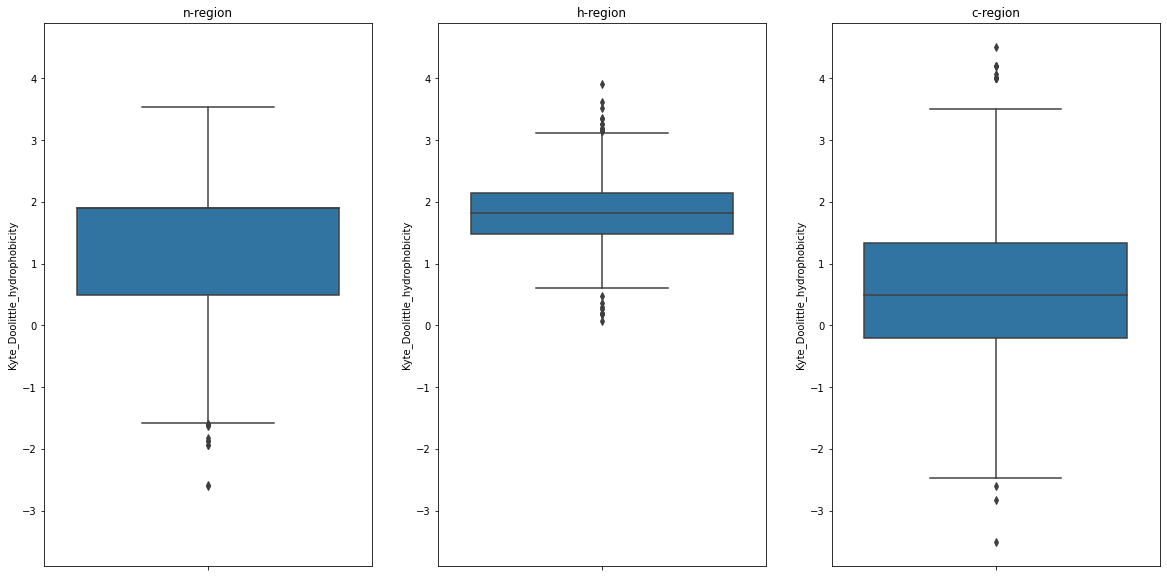

In [132]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(1,3,1)
ax1 = sns.boxplot(y=n_region["Kyte_Doolittle_hydrophobicity"], orient='vertical')


plt.title('n-region')
ax2 = plt.subplot(1,3,2, sharex=ax1, sharey=ax1)
ax2 = sns.boxplot(y=h_region["Kyte_Doolittle_hydrophobicity"], orient='Vertical')

plt.title('h-region')
ax3 = plt.subplot(1,3,3, sharex=ax1, sharey=ax1)

ax3 = sns.boxplot(y=c_region["Kyte_Doolittle_hydrophobicity"], orient='Vertical')
plt.title('c-region')



### Plotting isoelectric_point per regions

Text(0.5, 1.0, 'c-region')

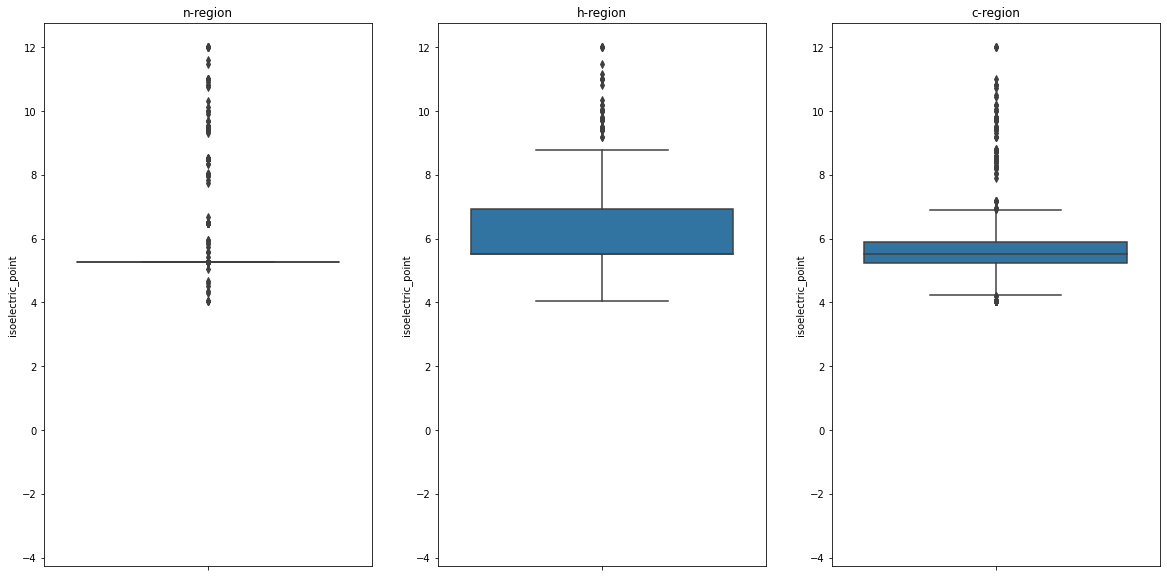

In [133]:

plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,3,1, sharex=ax1, sharey=ax1)
ax1 = sns.boxplot(y=n_region["isoelectric_point"], orient='vertical')


plt.title('n-region')
ax2 = plt.subplot(1,3,2, sharex=ax1, sharey=ax1)
ax2 = sns.boxplot(y=h_region["isoelectric_point"], orient='Vertical')

plt.title('h-region')
ax3 = plt.subplot(1,3,3, sharex=ax1, sharey=ax1)

ax3 = sns.boxplot(y=c_region["isoelectric_point"], orient='Vertical')
plt.title('c-region')


### Plotting charge_at_ph 7.6 per regions
The following article mentions that physiological ph is 7.6 for Aspergillus
ref : https://pubmed.ncbi.nlm.nih.gov/12135488/

Text(0.5, 1.0, 'c-region')

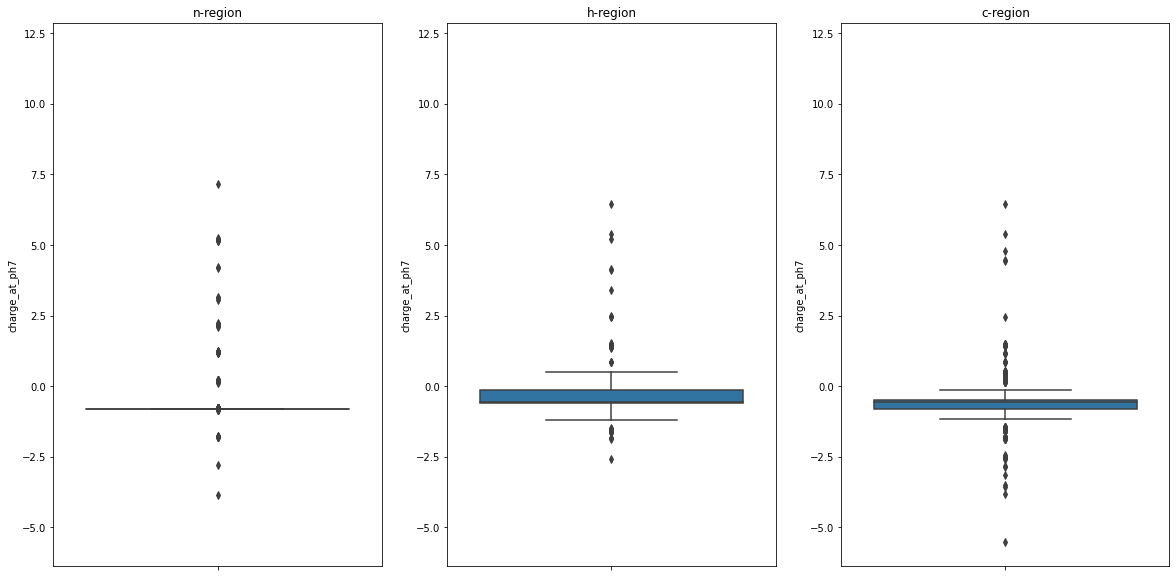

In [134]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(1,3,1, sharex=ax1, sharey=ax1)
ax1 = sns.boxplot(y=n_region["charge_at_ph7"], orient='vertical')

plt.title('n-region')
ax2 = plt.subplot(1,3,2, sharex=ax1, sharey=ax1)
ax2 = sns.boxplot(y=h_region["charge_at_ph7"], orient='Vertical')

plt.title('h-region')
ax3 = plt.subplot(1,3,3, sharex=ax1, sharey=ax1)

ax3 = sns.boxplot(y=c_region["charge_at_ph7"], orient='Vertical')
plt.title('c-region')

## PWM with signal peptides with all lenghts

Ok, so we know from the statistics above that 460+ signal peptides are exactly 20 amino acids long. We want to train ML algoriths on all sizes of signal peptides so lets try to append dashes to signal peptides that are shorter than the longest signal peptide

In [152]:
longest_signalP = 68

In [153]:
instances = []
for sp in list_of_SPs: 
    if len(sp) < longest_signalP:
        difference = longest_signalP - len(sp)
        instances.append(Seq(sp+ '-'*difference))

In [154]:
instances[:10]

[Seq('MAPSHSFMLFLSVICTHLCSLVV-------------------------------...---'),
 Seq('MHLRNIVIALAATAVASPVDLQD-------------------------------...---'),
 Seq('MKASFISRLLSLTAFAISSNLSY-------------------------------...---'),
 Seq('MGLFLTALGALSSVNVLYSRGRMPLKHLATLLCALSPTVAL-------------...---'),
 Seq('MHLQATLAVGLSLLGLTL------------------------------------...---'),
 Seq('MFSTMTPSLSKLVALSLFLGTAL-------------------------------...---'),
 Seq('MRIFSSIFAVANVLSLSTGRVIP-------------------------------...---'),
 Seq('MRSVSLFLWGLAPLLAS-------------------------------------...---'),
 Seq('MKSILYYTSCFIAVLGTVN-----------------------------------...---'),
 Seq('MGRQTPVYRAAQTCILGLVLLSFAS-----------------------------...---')]

In [155]:
from Bio import motifs

m = motifs.create(instances, alphabet="ACDEFGHIKLMNPQRSTVWY-")
m.consensus

Seq('MKLLLLLLLLLLLLAAA-------------------------------------...---')

In [156]:
df = pd.DataFrame(m.counts)
df

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,-
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,74,2,3,2,34,23,68,40,221,90,...,24,30,62,205,36,20,56,16,30,0
2,47,8,7,8,162,50,21,53,20,202,...,23,56,22,57,139,57,64,27,24,0
3,61,2,5,5,95,21,17,68,62,186,...,36,44,46,60,173,106,23,11,28,0
4,77,5,5,8,58,34,21,82,57,165,...,44,43,39,48,147,103,46,25,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1059
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1060
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1060
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1060


In [157]:
# getting the prevalence of each AA on each position 
df_pwn = pd.DataFrame(m.pwm)
df_pwn.to_csv('../data/02_all_signal_peptides/df_pwn_68_positions.csv', index_label=False )
df_pwn

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,-
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.069811,0.001887,0.002830,0.001887,0.032075,0.021698,0.064151,0.037736,0.208491,0.084906,...,0.022642,0.028302,0.058491,0.193396,0.033962,0.018868,0.052830,0.015094,0.028302,0.000000
2,0.044340,0.007547,0.006604,0.007547,0.152830,0.047170,0.019811,0.050000,0.018868,0.190566,...,0.021698,0.052830,0.020755,0.053774,0.131132,0.053774,0.060377,0.025472,0.022642,0.000000
3,0.057547,0.001887,0.004717,0.004717,0.089623,0.019811,0.016038,0.064151,0.058491,0.175472,...,0.033962,0.041509,0.043396,0.056604,0.163208,0.100000,0.021698,0.010377,0.026415,0.000000
4,0.072642,0.004717,0.004717,0.007547,0.054717,0.032075,0.019811,0.077358,0.053774,0.155660,...,0.041509,0.040566,0.036792,0.045283,0.138679,0.097170,0.043396,0.023585,0.032075,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000943,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999057
64,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
65,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
66,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [158]:
import logomaker as lm

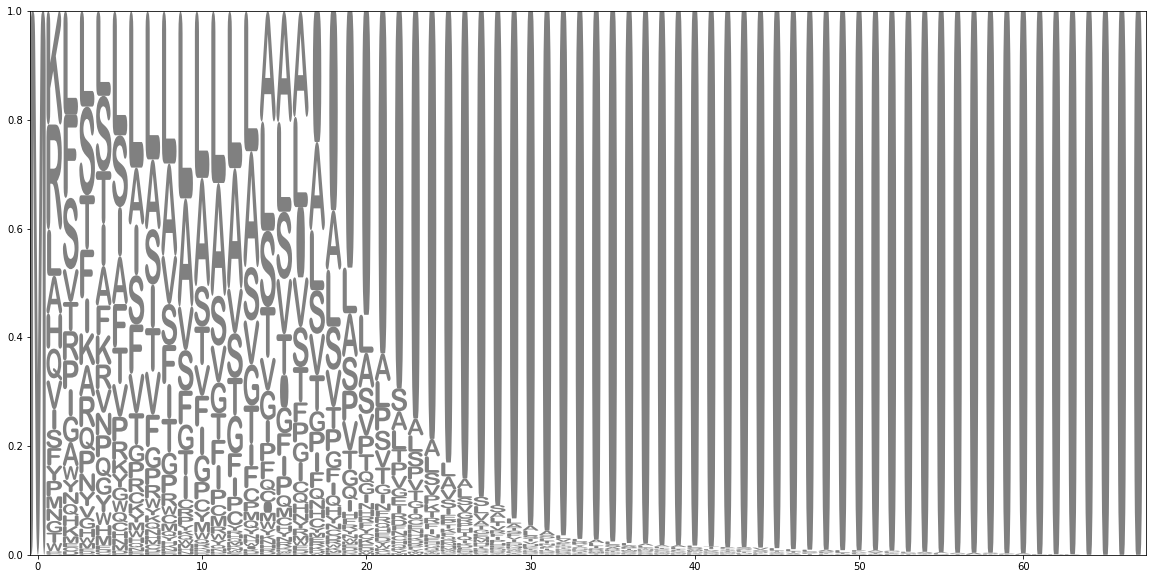

In [142]:
logo = lm.Logo(df_pwn, 
               font_name = 'Arial Rounded MT Bold', 
               figsize=(20,10))

## PWM with signal peptides of 20 aa lenght

ok so the following only works if you use the same length of sequences so we have to trim them. Not a fan of trimming. we will have to find a way around this: 

In [148]:
instances = []
for sp in list_of_SPs: 
    if len(sp) > 20: 
        instances.append(Seq(sp[:20]))
    else: 
        continue

In [149]:
from Bio import motifs

m = motifs.create(instances, alphabet="ACDEFGHIKLMNPQRSTVWY-")
m.consensus

Seq('MKLSSLLLLLLLLLLLLALA')

In [150]:
df = pd.DataFrame(m.counts)
df_pwn = pd.DataFrame(m.pwm)
df_pwn.to_csv('../data/02_all_signal_peptides/df_pwn_20_positions.csv')
df_pwn

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,-
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.106610,0.004264,0.006397,0.004264,0.029851,0.038380,0.061834,0.036247,0.170576,0.066098,...,0.021322,0.040512,0.046908,0.151386,0.051173,0.023454,0.074627,0.021322,0.023454,0.0
2,0.046908,0.004264,0.012793,0.014925,0.138593,0.059701,0.029851,0.057569,0.019190,0.164179,...,0.029851,0.055437,0.019190,0.055437,0.144989,0.051173,0.036247,0.019190,0.021322,0.0
3,0.044776,0.002132,0.010661,0.006397,0.098081,0.025586,0.014925,0.053305,0.063966,0.144989,...,0.036247,0.051173,0.038380,0.072495,0.164179,0.102345,0.019190,0.006397,0.034115,0.0
4,0.053305,0.006397,0.006397,0.008529,0.061834,0.029851,0.017058,0.076759,0.059701,0.110874,...,0.057569,0.042644,0.038380,0.063966,0.164179,0.100213,0.036247,0.014925,0.025586,0.0
5,0.072495,0.017058,0.010661,0.004264,0.070362,0.029851,0.017058,0.078891,0.038380,0.172708,...,0.014925,0.053305,0.031983,0.046908,0.153518,0.085288,0.042644,0.014925,0.027719,0.0
6,0.074627,0.029851,0.004264,0.002132,0.085288,0.044776,0.021322,0.076759,0.034115,0.236674,...,0.008529,0.036247,0.017058,0.049041,0.093817,0.051173,0.072495,0.017058,0.021322,0.0
7,0.074627,0.010661,0.012793,0.010661,0.061834,0.031983,0.008529,0.070362,0.027719,0.223881,...,0.017058,0.036247,0.025586,0.053305,0.106610,0.106610,0.072495,0.021322,0.017058,0.0
8,0.149254,0.017058,0.004264,0.010661,0.061834,0.044776,0.012793,0.061834,0.012793,0.238806,...,0.010661,0.036247,0.012793,0.053305,0.095949,0.053305,0.076759,0.014925,0.010661,0.0
9,0.170576,0.014925,0.002132,0.000000,0.057569,0.051173,0.010661,0.038380,0.017058,0.307036,...,0.010661,0.021322,0.014925,0.034115,0.074627,0.049041,0.083156,0.010661,0.019190,0.0


In [43]:
import logomaker as lm

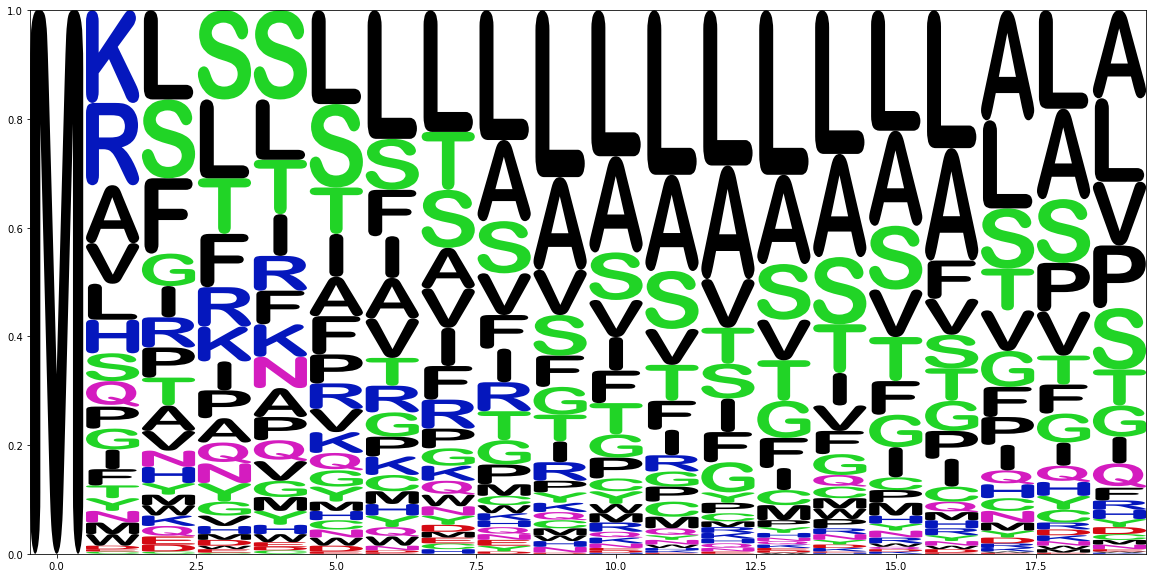

In [46]:
logo = lm.Logo(df_pwn, 
               font_name = 'Arial Rounded MT Bold', 
               figsize=(20,10))

## Getting the most prominent AA per position

In [48]:
transposed = df_pwn.T

list_of_top_aa_per_position= []
for column in transposed.columns[1:]:
    print(str(transposed[column].nlargest(4)))
    
    # calculate the largest 
    largest = float(pd.DataFrame(transposed[column].nlargest(1)).reset_index().iloc[:,-1])
    #
    #if largest > 0.3: 
    #    position_df = pd.DataFrame(transposed[column].nlargest(1)).reset_index()
    #    list_of_aa = list(position_df['index'])
    #    list_of_top_aa_per_position.append(list_of_aa)
        
    
    if largest > 0.25: 
        position_df = pd.DataFrame(transposed[column].nlargest(2)).reset_index()
        list_of_aa = list(position_df['index'])
        list_of_top_aa_per_position.append(list_of_aa)
    
    #if largest > 0.20: 
    #    position_df = pd.DataFrame(transposed[column].nlargest(3)).reset_index()
    #    list_of_aa = list(position_df['index'])
    #    list_of_top_aa_per_position.append(list_of_aa)
    #    
        
    else: 
        position_df = pd.DataFrame(transposed[column].nlargest(3)).reset_index()
        list_of_aa = list(position_df['index'])
        list_of_top_aa_per_position.append(list_of_aa)
list_of_top_aa_per_position

K    0.170576
R    0.151386
A    0.106610
V    0.074627
Name: 1, dtype: float64
L    0.164179
S    0.144989
F    0.138593
G    0.059701
Name: 2, dtype: float64
S    0.164179
L    0.144989
T    0.102345
F    0.098081
Name: 3, dtype: float64
S    0.164179
L    0.110874
T    0.100213
I    0.076759
Name: 4, dtype: float64
L    0.172708
S    0.153518
T    0.085288
I    0.078891
Name: 5, dtype: float64
L    0.236674
S    0.093817
F    0.085288
I    0.076759
Name: 6, dtype: float64
L    0.223881
S    0.106610
T    0.106610
A    0.074627
Name: 7, dtype: float64
L    0.238806
A    0.149254
S    0.095949
V    0.076759
Name: 8, dtype: float64
L    0.307036
A    0.170576
V    0.083156
S    0.074627
Name: 9, dtype: float64
L    0.268657
A    0.176972
S    0.087420
V    0.068230
Name: 10, dtype: float64
L    0.302772
A    0.176972
S    0.106610
T    0.066098
Name: 11, dtype: float64
L    0.285714
A    0.208955
V    0.089552
T    0.066098
Name: 12, dtype: float64
L    0.302772
A    0.164179
S    0.10

[['K', 'R', 'A'],
 ['L', 'S', 'F'],
 ['S', 'L', 'T'],
 ['S', 'L', 'T'],
 ['L', 'S', 'T'],
 ['L', 'S', 'F'],
 ['L', 'S', 'T'],
 ['L', 'A', 'S'],
 ['L', 'A'],
 ['L', 'A'],
 ['L', 'A'],
 ['L', 'A'],
 ['L', 'A'],
 ['L', 'A'],
 ['L', 'A', 'S'],
 ['L', 'A'],
 ['A', 'L', 'S'],
 ['L', 'A', 'S'],
 ['A', 'L', 'V']]

In [49]:
len(list_of_top_aa_per_position)

19

# Combinatorial explosion

In order to engineer signal peptides, a prediction table must be generated to identify the specific amino acid sequences that are most likely to function as signal peptides. However, the number of possible combinations of the 20 amino acids that make up proteins is extremely large. For example, if a signal peptide consists of just 20 amino acids, there are 20^20 (or approximately 2 x 10^13) possible combinations. This large number of possibilities makes it difficult to predict which sequences will function as signal peptides and which will not. To overcome this challenge, computational methods must be applied. In the next notbook we well show such a method with the use of machine learning. 

An example of how quickly this happens is visualized below:

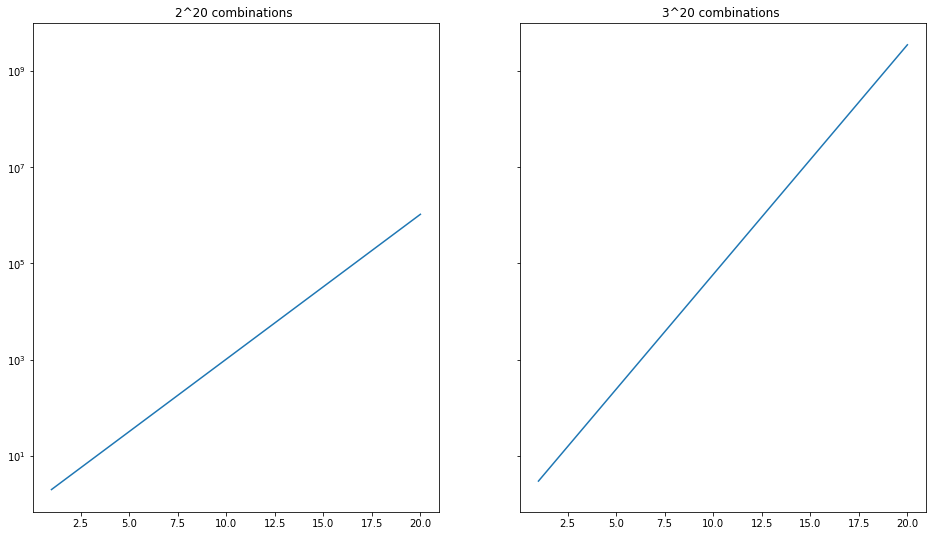

In [77]:
import matplotlib.pyplot as plt

## Generating 3^20 combinations 
data_points1 = []
index1 = []

for i in range(1,21): 
    data_points1.append(2**i)
    index1.append(i)
    
## Generating 2^20 combinations 
data_points2 = []
index2 = []
for i in range(1,21): 
    data_points2.append(3**i)
    index2.append(i)

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,9))

ax1.plot(index1, data_points1)
ax1.set_title('2^20 combinations ')
ax2.plot(index2,data_points2)
ax2.set_title('3^20 combinations ')
plt.yscale("log")


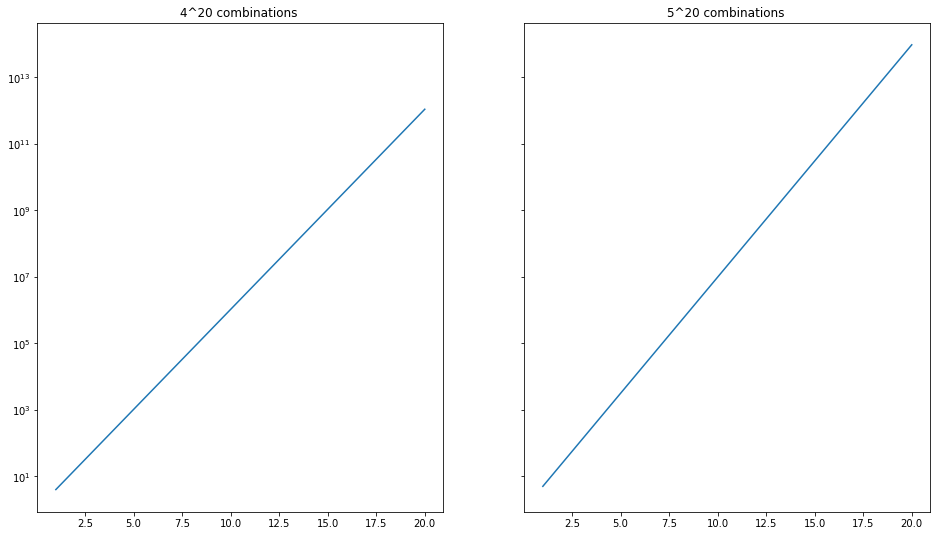

In [78]:
import matplotlib.pyplot as plt

## Generating 3^20 combinations 
data_points1 = []
index1 = []

for i in range(1,21): 
    data_points1.append(4**i)
    index1.append(i)
    
## Generating 2^20 combinations 
data_points2 = []
index2 = []
for i in range(1,21): 
    data_points2.append(5**i)
    index2.append(i)

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,9))

ax1.plot(index1, data_points1)
ax1.set_title('4^20 combinations ')
ax2.plot(index2,data_points2)
ax2.set_title('5^20 combinations ')
plt.yscale("log")

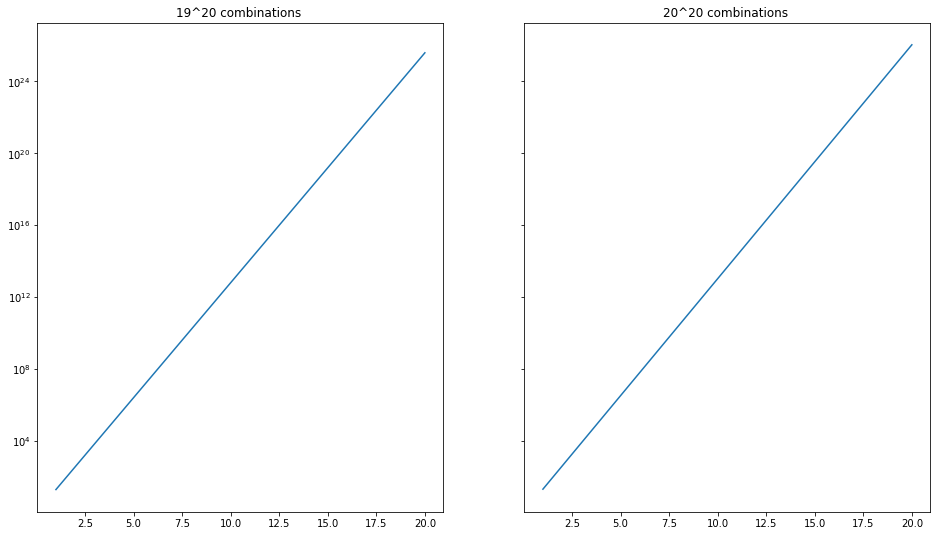

In [79]:
import matplotlib.pyplot as plt

## Generating 3^20 combinations 
data_points1 = []
index1 = []

for i in range(1,21): 
    data_points1.append(19**i)
    index1.append(i)
    
## Generating 2^20 combinations 
data_points2 = []
index2 = []
for i in range(1,21): 
    data_points2.append(20**i)
    index2.append(i)

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,9))

ax1.plot(index1, data_points1)
ax1.set_title('19^20 combinations ')
ax2.plot(index2,data_points2)
ax2.set_title('20^20 combinations ')
plt.yscale("log")

In [50]:
from itertools import product

In [51]:
#%%time
#all_combinations = list(product(*list_of_top_aa_per_position))
#column_names = [i for i in range(1,20)]
#df_all_combinations = pd.DataFrame(all_combinations, columns = column_names)
#df_all_combinations[0] = 'M'
#df_all_combinations_with_M = df_all_combinations[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
#df_all_combinations_with_M.to_csv('../data/all_signal_peptides/combinations_of_2_3_SPs.csv')

In [54]:
#%%time
#df_with_all_combinations = pd.read_csv('../data/all_signal_peptides/combinations_of_2_3_SPs.csv')
#df_with_all_combinations

In [63]:
import numpy as np